In [12]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [24]:
def add_noise(ds, noise_factor = 0.3):
    ds_noisy = ds + noise_factor * np.random.randn(*ds.shape)
    ds_noisy = np.clip(ds_noisy, 0., 1.)
    
    return ds_noisy

In [15]:
def show_original_and_noisy(x, x_noisy, n=6):
    plt.figure(figsize=(12,4))
    for i in range(n):
        plt.subplot(2,n,i+1)
        plt.imshow(x[i], cmap='gray')
        plt.title("Original")
        plt.axis('off')

        plt.subplot(2,n,n+i+1)
        plt.imshow(x_noisy[i], cmap='gray')
        plt.title("Noisy")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [25]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

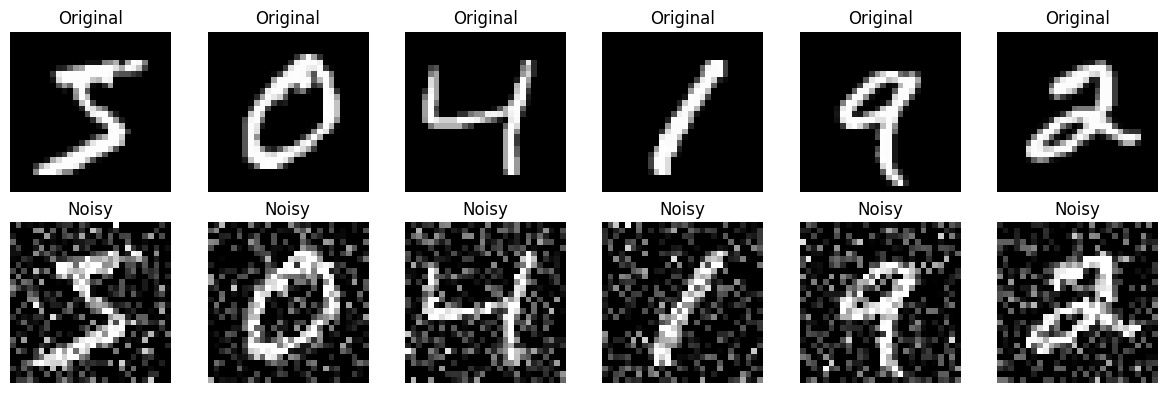

In [26]:
show_original_and_noisy(x_train, x_train_noisy, n=6)

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
input_shape = (28, 28, 1)

denoise_model = models.Sequential([
   layers.Input(shape=input_shape),

    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(padding='same'),

    layers.Conv2D(128, 3, activation='relu', padding='same'),

    layers.Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same'),
    layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same'),
    layers.Conv2D(1, 3, activation='sigmoid', padding='same')
])

denoise_model.compile(optimizer='adam', loss='mse')

denoise_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 14, 14, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 28, 28, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 499,137 (1.90 MB)

 Trainable params: 499,137 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
 42/422 ━━━━━━━━━━━━━━━━━━━━ 1:41 267ms/step - loss: 0.1520

KeyboardInterrupt: 

In [ ]:
x_train_exp = np.expand_dims(x_train, -1)
x_train_noisy_exp = np.expand_dims(x_train_noisy, -1)
x_test_exp = np.expand_dims(x_test, -1)
x_test_noisy_exp = np.expand_dims(x_test_noisy, -1)

history = denoise_model.fit(
    x_train_noisy_exp, x_train_exp,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

denoised = denoise_model.predict(x_test_noisy_exp[:6])

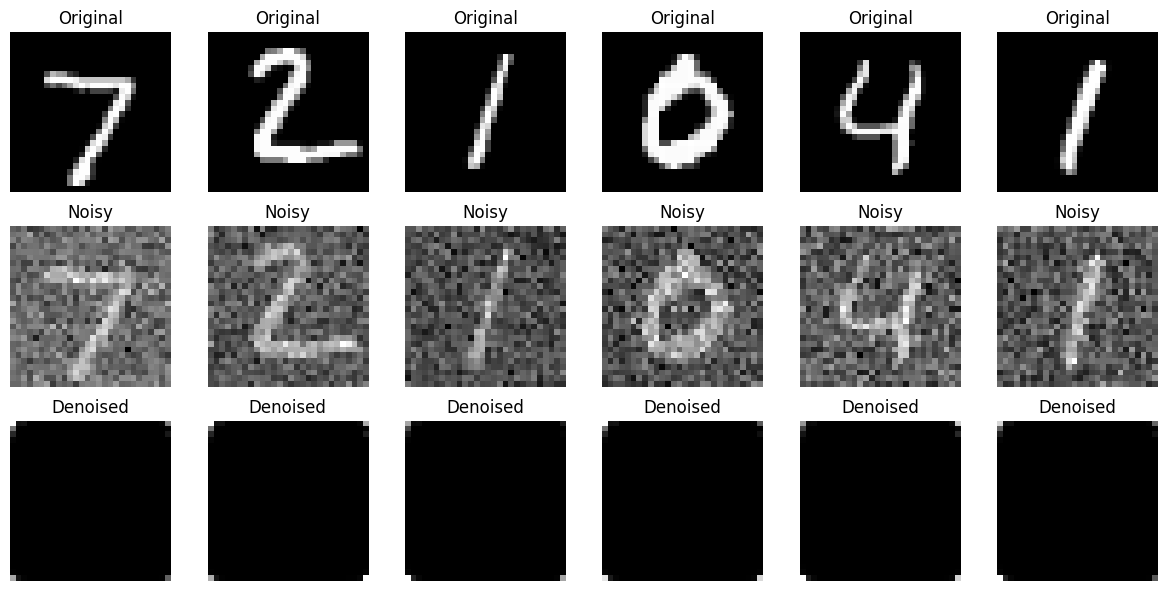

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

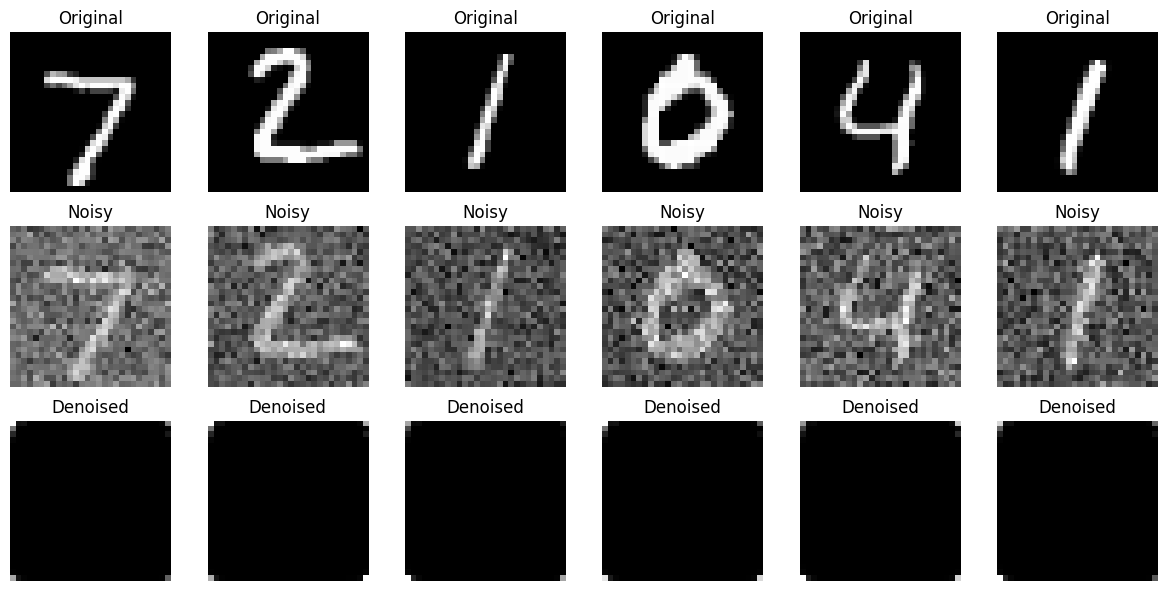

In [ ]:
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(3,6,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    plt.subplot(3,6,6+i+1)
    plt.imshow(x_test_noisy[i], cmap='gray')
    plt.axis('off')
    plt.title('Noisy')

    plt.subplot(3,6,12+i+1)
    plt.imshow(denoised[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title('Denoised')

plt.tight_layout()
plt.show()